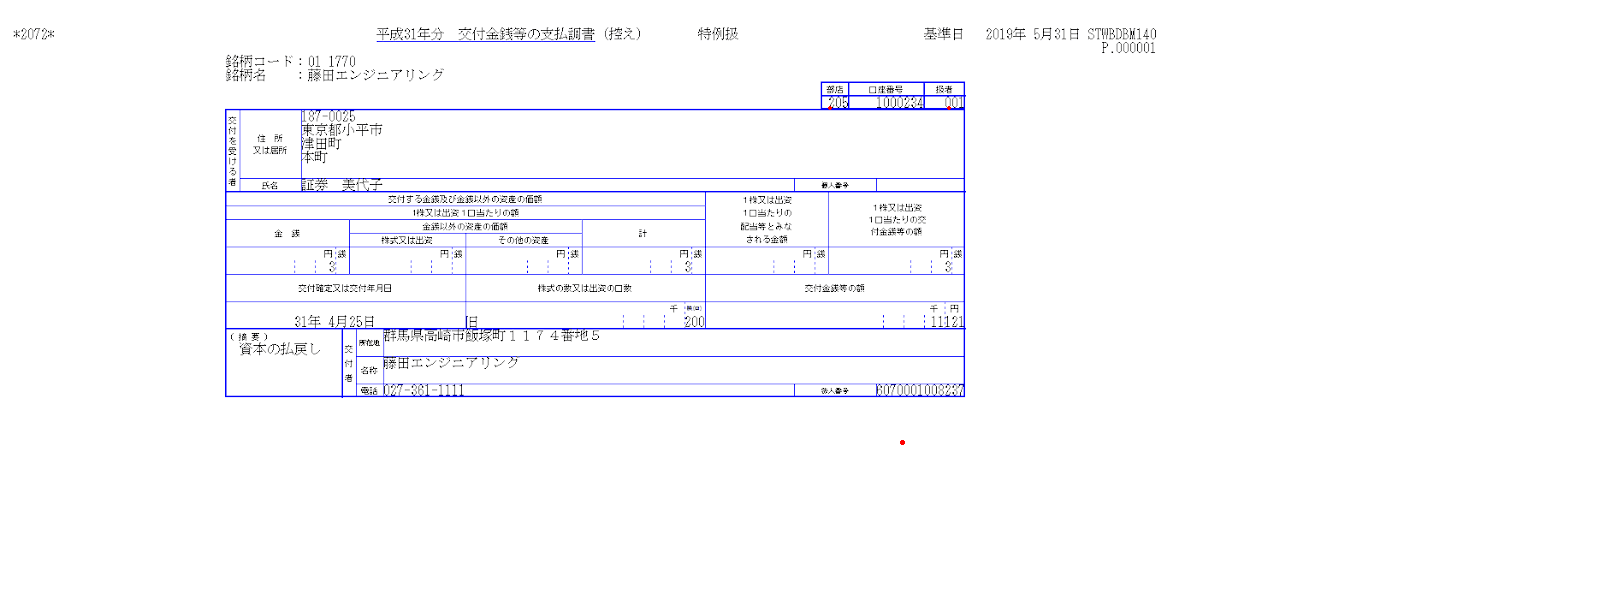

In [4]:
import cv2,os
import matplotlib.pyplot as plt
from PIL import Image

PWD = os.getcwd()
image_folder_pass = PWD + '/static/image/'
image_folder_output_pass = PWD + '/static/output_image/'
png_img_name = '1_交付金銭等の支払調書.png'

# 画像インポート
img1 = cv2.imread(image_folder_pass + 'mae/' +png_img_name)
img2 = cv2.imread(image_folder_pass + 'ato/' +png_img_name)

# グレースケース処理
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 絶対差分を取る
diff = cv2.absdiff(img1_gray, img2_gray)

# 閾値を設けて、差分箇所に強弱をつける。
thresh = 30
diff[diff < thresh] = 0
diff[diff >= thresh] = 255


contours, hierarchy = cv2.findContours(diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 差分箇所を描画
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 2)


img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(img)
display(pil_img)